In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
device='mps'

In [4]:
X1=torch.rand(10000,1)
X2=torch.rand(10000,1)
X3=torch.rand(10000,1)
X1.shape, X2.shape, X3.shape

(torch.Size([10000, 1]), torch.Size([10000, 1]), torch.Size([10000, 1]))

In [5]:
Y1=((X1+X2+X3)<1).float()
Y2=((1<(X1+X2+X3))&(X1+X2+X3<2)).float()
Y3=((X1+X2+X3)>2).float()
Y1.shape, Y2.shape, Y3.shape

(torch.Size([10000, 1]), torch.Size([10000, 1]), torch.Size([10000, 1]))

In [6]:
Data=torch.cat([X1,X2,X3,Y1,Y2,Y3],axis=1)
Data=Data.to(device)
Data.shape

torch.Size([10000, 6])

In [7]:
Data

tensor([[0.2663, 0.9370, 0.6629, 0.0000, 1.0000, 0.0000],
        [0.4093, 0.0430, 0.2053, 1.0000, 0.0000, 0.0000],
        [0.8761, 0.4159, 0.3009, 0.0000, 1.0000, 0.0000],
        ...,
        [0.3065, 0.2171, 0.5050, 0.0000, 1.0000, 0.0000],
        [0.1296, 0.4348, 0.8844, 0.0000, 1.0000, 0.0000],
        [0.3549, 0.4801, 0.9428, 0.0000, 1.0000, 0.0000]], device='mps:0')

In [8]:
train_size=int(len(Data)*0.7)
test_size=len(Data)-train_size
Data=Data[torch.randperm(Data.size(0)) , : ]
train_Data=Data[:train_size, :]
test_Data=Data[train_size:, :]
train_Data.shape, test_Data.shape

(torch.Size([7000, 6]), torch.Size([3000, 6]))

In [9]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN,self).__init__()
        self.net=nn.Sequential(
            nn.Linear(3,5), nn.ReLU(),
            nn.Linear(5,5), nn.ReLU(),
            nn.Linear(5,5), nn.ReLU(),
            nn.Linear(5,3)
        )
    def forward(self,x):
        y=self.net(x)
        return y

In [10]:
model=DNN().to(device)
model

DNN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=3, bias=True)
  )
)

In [11]:
for name,param in model.named_parameters():
    print(name, param.shape, param)

net.0.weight torch.Size([5, 3]) Parameter containing:
tensor([[ 0.3859,  0.1674,  0.1193],
        [-0.3484, -0.3250, -0.3142],
        [-0.3010, -0.2506,  0.4077],
        [ 0.0042, -0.5022, -0.4146],
        [ 0.0515, -0.1397,  0.2078]], device='mps:0', requires_grad=True)
net.0.bias torch.Size([5]) Parameter containing:
tensor([ 0.1176, -0.0913,  0.4326, -0.0020,  0.3266], device='mps:0',
       requires_grad=True)
net.2.weight torch.Size([5, 5]) Parameter containing:
tensor([[ 0.0335, -0.2898,  0.1036,  0.3900, -0.1033],
        [ 0.2661,  0.1452,  0.3967,  0.1550,  0.0192],
        [ 0.4160,  0.0969, -0.0897,  0.0894, -0.3458],
        [-0.3494,  0.0175,  0.4250,  0.2888, -0.0016],
        [ 0.2545, -0.0675, -0.2355, -0.4399, -0.0683]], device='mps:0',
       requires_grad=True)
net.2.bias torch.Size([5]) Parameter containing:
tensor([-0.1939,  0.3291, -0.0706,  0.0634, -0.3172], device='mps:0',
       requires_grad=True)
net.4.weight torch.Size([5, 5]) Parameter containing:
tenso

In [12]:
loss_fn=nn.MSELoss()

In [13]:
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [14]:
epochs=1000
losses=[]

X=train_Data[:,:3]
Y=train_Data[:,3:]

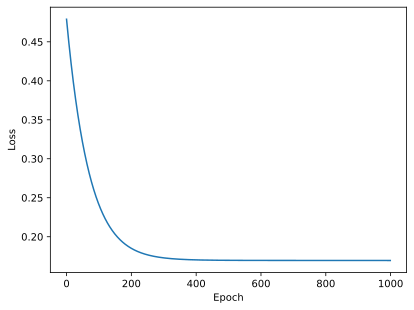

In [15]:
for epoch in range(epochs):
    Pred=model(X)
    loss=loss_fn(Pred,Y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
Fig=plt.figure()
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [17]:
X=test_Data[:,:3]
Y=test_Data[:,3:]

with torch.no_grad():
    Pred=model(X)
    Pred[:,torch.argmax(Pred,axis=1)]=1
    Pred[Pred!=1]=0
    correct=torch.sum((Pred==Y).all(1))
    total=Y.size(0)
    print('Accuracy: ',correct/total)

Accuracy:  tensor(0.6603, device='mps:0')


In [18]:
torch.save(model,'model.pt')

In [19]:
new_model=torch.load('model.pt')